# Upset-Downset

This notebook is an introduction to the game Upset-Downset and the interface we've written for it in Python. In this first section lets learn the ups and downs of Upset-Downset.

## What Is Upset-Downset?

Combinatorial game theory (CGT) applies abstract algebra to games having:
- two players who alternate turns,
- clearly defined rules which specify each players moves,
- perfect information, i.e., each player has complete knowledge of the game at all times,
- no chance elements, e.g., no dice rolling or card shuffling, and
- finite play where the first player unable to move loses.

Upset-Downset is a combinatorial game in which the two players alternate turns deleting nodes
from graphs. The **Up** player moves by deleting a node, together with any
nodes connected to it by a path moving strictly *upward.* Similarly, the **Down** player moves by deleting a
node, together with any nodes connected to it by a path moving strictly *downward*. Eventually one of the
players will find they cannot move because there are no nodes left. Whoever is first to find themselves in
this predicament loses.

The best way to learn to play, is *to* play! To begin, lets import the `upDown` module, initialize a game and plot it using the `plot()` method.

In [16]:
from upDown import UpDown

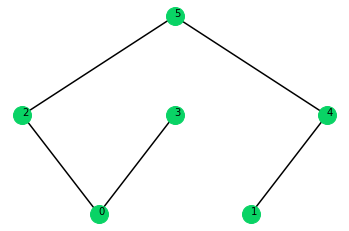

In [17]:
graph = {0:[2,3], 1:[4], 2:[5], 3:[], 4:[5], 5:[]}
G = UpDown(graph)
G.plot()

As you can see it was easy to initialize the `upDown` object $G$. All that was needed was a dictionary representation of the graph:  every node $x$ in the graph is a key with corresponding value being the list of all nodes that are directly adjacent and above $x$.

You can interactively play the game $G$ using the `play()` method and following the given instructions.

In [ ]:
G.play()

### The Sums of Games

Notice how the game $G$ evolves from a single graph to multiple graphs as the players make moves. This occurs often when playing Upset-Downset and we call a game played on several graphs,
side-by-side, a *sum* of games. In particular, when playing the sum of games, a player may only move in a single game at
a time, that is, on their turn a player may only delete nodes from one graph.

We can *add* two or more games together using the `+` operator. Lets try this. First well intsnatiate another game `H`.

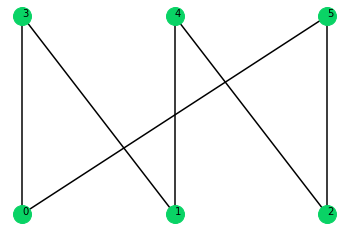

In [28]:
another_graph = {0:[3,5], 1:[3,4], 2:[4,5], 3:[], 4:[], 5:[]}
H = UpDown(another_graph)
H.plot()

Now we'll consider the sum `G + H`.

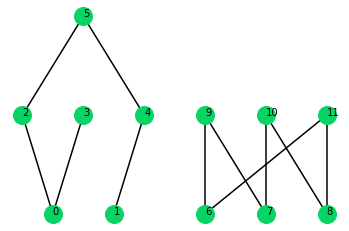

In [31]:
K = G + H
K.plot()

### The Outcome of Game

A main focus of CGT is to determine winning
strategies for particular games in the form of an algebraic description of their outcomes. It is fundamental
to combinatorial game theory that any given combinatorial game has exactly one of four outcomes. In the
case of Upset-Downset this translates to the fact that for any particular game of Upset-Downset *exactly* one of the following is true:
- the game is a win for the second player to move, 
- a win for the first person to move, 
- the **Down** player wins no matter who starts the game, 
- or the **Up** player wins nomatter who starts the game.

We'll denote these outcomes as *Previous*, *Next*, *Up* and *Down*, respectively. So what's the oucome of  the game `G`? What about `H`? Or `G + H`?

In [36]:
print(f'The outcome of G is that the {G.outcome()} player to move wins the game.')
print(f'The outcome of H is that {H.outcome()} player to move wins the game.')
print(f'The outcome of G + H is that {K.outcome()} player to move wins the game.')

The outcome of G is that the Next player to move wins the game.
The outcome of H is that Previous player to move wins the game.
The outcome of G + H is that Next player to move wins the game.


Notice that both `G` and `G + H` have the same outcome while `H` is a second-player win...In general, games which the second player wins do not affect the outcome when summed with other games. In that sense we may think of them as *zero games*. 

### The Negative of A Game

On the same note, if we take any game of upset-downset, flip it upside down, and sum the original game
with its flipped version, we obtain a zero game. For this reason we may think of the two versions of the
game, the original and its flipped copy, as *negatives* of one another.

So whats the negative of `H`. let's find out by using the `-` operator.

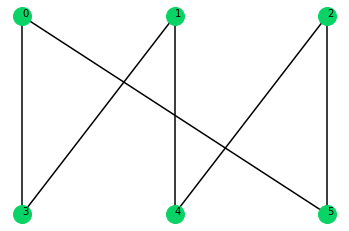

In [42]:
flip_H = -H
flip_H.plot()

## Blue, Green and Red Nodes!

To make things even more exciting, lets add some color to our nodes: blue, green or red! The only added caveat is that  **Up** may only choose from green or blue nodes and **Down** from only green or red nodes. Though, whichever node **Up**/**Down** chooses, all nodes above/below the chosen node are still removed regardless of their color.

Lets color the nodes in the game $G$. To do so, we only need to define a coloring dictionary indicating which color (values) a specific node (key) is, and re-initialize $G$ with the coloring dictionary as an argument. (We use the convention that $1$ corresponds to blue, $0$ to green, and $-1$ to red.)

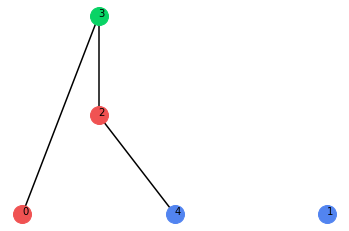

In [4]:
colors = {0:-1, 1:1, 2:-1, 3:0, 4:1}
G = UpDown(graph, colors)
G.plot()

Let's play again, but with the new coloring!

In [ ]:
G.play()

# Playing Random Games

The game $G$ is fine, but there's no limit to the size of the game, so why not think bigger than five nodes? We will import the `randomUpDown` module in the following cell and use it to generate random games.

In [ ]:
from randomUpDown import *

In the cell below we randomly generate a game of Upset-Downset with `num_nodes` nodes for you to test your skills. The default for `num_nodes` is $10$, but it's a variable so do as your heart desires. Additionally, the default is to randomly color the nodes blue, green or red. To turn this feature off and play on all green games, set `RGB = False`. Have fun!

In [ ]:
num_nodes = 10
RGB = True #False

#Comment this line out if you want to play a specific game again.
R = RandomGame(num_nodes, RGB = RGB)

R.play()

# Too Random?

In this section we describe two more subclasses of `UpDown` for playing games with more structure.

## This Notebook Would Not Be Complete Without...

playing Upset-Downset on complete bipartite graphs. Let's import the `completeBipartiteUpDown` module and initialize an instance of `CompleteBipartiteGame` with a list of ordered pairs as an argument. Each ordered pair (m,n) defines a distinct complete bipartite graph having m-nodes on top and n-nodes on bottom.

In [5]:
from completeBipartiteUpDown import *

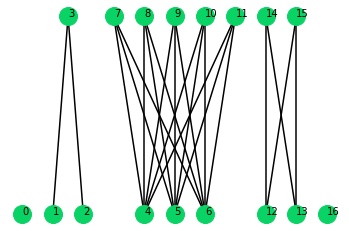

In [6]:
graphs = [(0,1), (1,2), (5,3), (2,2), (0,1)]
K = CompleteBipartiteGame(graphs)
K.plot()

Give it a go!

In [ ]:
K.play()

## The Secret of Nim

That's right, Upset-Downset secretly hides Nim in disguise. If you're unfamiliar, in Nim two players take turns removing objects from heaps. On their turn a player may remove any number of objects from exactly one heap, and the player to remove the last object wins. 

Lets see how a game of Nim can be realized as a game of Upset-Downset. To start we import the `nimUpDown` module and initialize a `NimGame` object with a list of the heap sizes we'd like to play on as an argument. 

In [7]:
from nimUpDown import *

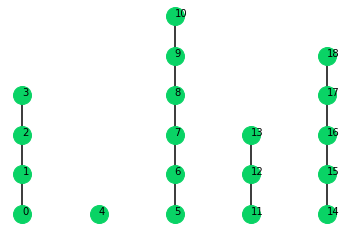

In [9]:
heaps = [4,1,6,3,5]
N = NimGame(heaps)
N.plot()

In making a move in a game of Nim all that matters is which heap and how many objects to remove. Say, **Up** would like to remove 3 objects fom the last heap in the game `N`. To do so **Up** must *play* node 16 (three nodes from the top) using the `up_play()` method leaving game at `NL`.

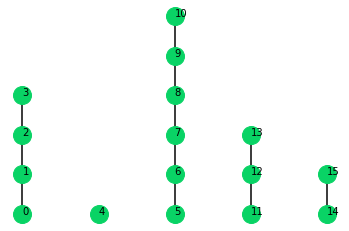

In [11]:
NL = N.up_play(16)
NL.plot()

Now, say **Down** would like to remove 2 objects from the first heap in the game `NL`. Then **Down** must *play* node 1 (two nodes from the bottom) leaving the game at `NLR`.

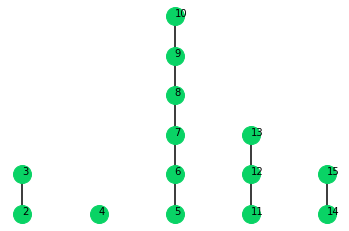

In [12]:
NLR = NL.down_play(1)
NLR.plot()

How about you give it a try with the game `N`.

In [ ]:
N.play()

# So You Got Some Chops?

AlphaZero

# Outcomes

In [16]:
from upDown import *
from randomUpDown import *
import numpy as np

Upset-Downset is an example of a two player game with perfect information for all (nothing is hideen from either player), there are no ties, and the game will end in a finite number of plays (at most the number of nodes). Because of this, there should exist a way to predict the possible outcomes for each game. In other words, if each player is playing 'optimally' can we tell who is going to win? Let's explore this idea further.

Consider let's consider the four games on node size $1$ and $0$. The empty game ($0$ nodes) $G_0$, the game with one green node $G_1$, the game with one red node $R_1$, and the game with one blue node $B_1$.

G_0:


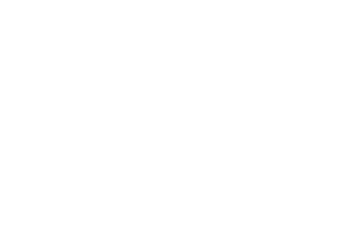

G_1:


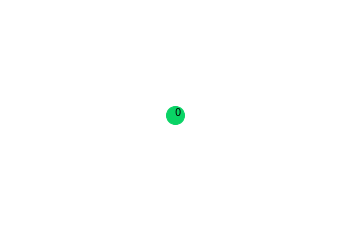

R_0:


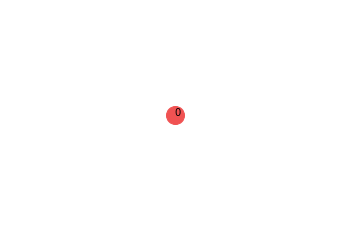

B_0:


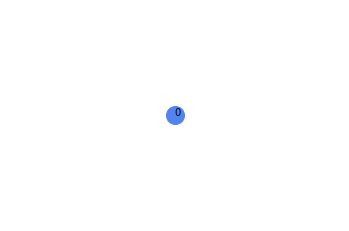

In [15]:
G_0 = UpDown({}); G_1 = UpDown({0:[]}); R_1 = UpDown({0:[]}, coloring={0:-1}); B_1 = UpDown({0:[]}, coloring={0:1})
print('G_0:'); G_0.plot()
print('G_1:'); G_1.plot()
print('R_0:'); R_1.plot()
print('B_0:'); B_1.plot()

Recall that Up can only choose blue or green nodes and Down can only choose red or green nodes. So each or these games, $G_1, G_1, R_1,$ and $B_1$ represent a different outcome. Notice that the player who goes first will lose $G_0$ but win $G_1$, while the Up player will always win $R_1$ and the Down player will always win $B_1$ (no matter which order they go in). It turns out that these our the four possible outcomes if the players are playing optimally: first player win, second player win, Up win, and Down win. Indeed, we can recursively check this!

Suppose we know the outcomes for games of (node) size $n$ or smaller. Let $G$ be of size $n+1$. The game begins

1. If Up starts and there is a node $x$ such that $G-x$ is either a second player win or an Up win AND if 
   if Down starts and there is a node $y$ such that $G-y$ is either a second player win or an Down win, then
   $G$ is a first player win.
   

2. If Up starts and there is not a node $x$ such that $G-x$ is either a second player win or an Up win AND 
   if Down starts and there is not a node $y$ such that $G-y$ is either a second player win or an Down win, then
   $G$ is a second player win.


3. If Up starts and there is a node $x$ such that $G-x$ is either a second player win or an Up win AND 
   if Down starts and there is not a node $y$ such that $G-y$ is either a second player win or an Down win, then
   $G$ is an Up player win.


4. If Up starts and there is not a node $x$ such that $G-x$ is either a second player win or an Up win AND 
   if Down starts and there is a node $y$ such that $G-y$ is either a second player win or an Down win, then
   $G$ is an Down player win.

This is essentially what the method outcome() does on UpDown obects. It will tell you who can win given optimal play. One thing to watch out for is that the string 'Next' refers to a first player win and 'Previous' refers to a second player win. Try it out below! 

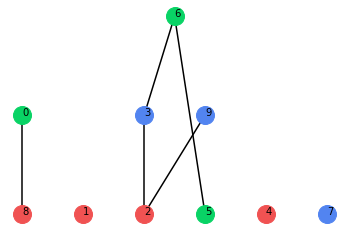

'Down'

In [50]:
n = 10 #try smaller n if you want to work the outcomes out by hand. 
       #Beware, increasing n might lead to outcome() running very slowly.
G = RandomGame(n, RGB = np.random.choice([True, False]))
G.plot()
G.outcome()

# Approximating the Outcome

The outcome() method essentially builds a giant recursive tree, and fills in values from the ground level up. In fact, if we had access to this tree, we could even know the best way to play the game. Unfortunately, this tree becomes unmanageable very fast as the size of the game becomes very large. For example, if you play a green game on $20$ nodes with no edges, this recursion tree will have $20! = 2432902008176640000$ nodes. We can cut a few corners to make this algorithm a bit more efficient, but the recursion solution is still far too slow to work with general "large" games.

One approach way to solve this problem is to flip it around. Instead of using an outcome function to learn how to play optimally, we use an optimal player to learn the outcomes. Assume we had an agent $\mathcal{A}$ that could play optimally. We will define optimal play as always winning if you can. We can define the following function $F_{\mathcal{A}}(G,x)\mapsto \{0,1\}$, where $G$ is a game of Upset-Downset and $x$ is either 'Up' or 'Down'. The function represents the two agents playing eachother and returns $1$ if the first player wins the match and $0$ otherwise. 

Now let $\mathrm{Out}(G)\mapsto{-1,0,1,2}$ be the function with $G$ an Upset-Downset game, where it outputs $2$ if $G$ a first player win, $1$ if it is an up win, $0$ if it is a second player win, and $-1$ if it is a down win. It's easy to verify the following identity

$\mathrm{Out}(G) \quad = \quad 2F_{\mathcal{A}}(G,\mathrm{Up})F_{\mathcal{A}}(G,\mathrm{Down})\, +\, F_{\mathcal{A}}(G,\mathrm{Up})\, -\, F_{\mathcal{A}}(G,\mathrm{Down})$

This is solves our recursion problem, because it only requires that we play through the game twice to compute $F_{\mathcal{A}}(G,\mathrm{Up})$ and $F_{\mathcal{A}}(G,\mathrm{Down})$. Unfortunately, we have another problem, we can never know if $\mathcal{A}$ is playing optimally without a proper outcome function. So it will be more honest if we changed our identity to an approximation

$\mathrm{Out}(G) \quad \approx \quad 2F_{\mathcal{A}}(G,\mathrm{Up})F_{\mathcal{A}}(G,\mathrm{Down})\, +\, F_{\mathcal{A}}(G,\mathrm{Up})\, -\, F_{\mathcal{A}}(G,\mathrm{Down})$

However, if $\mathcal{A}$ didn't always play optimally (say mostly optimally), our function $F_{\mathcal{A}}(G,x)$ becomes a random variable, so $\mathrm{Out}(G)$ is as well. As $\mathcal(A)$ approaches optimality the distribution of $F_{\mathcal{A}}(G,x)$ will also approach the correct outcomes, so to will $\mathrm{Out}(G)$.